In [1]:
from pathlib import Path
import pandas as pd
import msgpack

In [2]:
DIR = Path("io/2021-01-22/embeddings")
n_responses = 15_000

In [3]:
def _get_history_config(f):
    with open(f, "rb") as _f:
        data = msgpack.load(_f)
    return data["meta"], data["history"]

files = DIR.glob(f"*.msgpack")
files = list(files)
print("Number of files:", len(files))
raw = [_get_history_config(f) for f in files]
print("Read files: ", len(raw))

dfs = []
n_ans = {meta["n_responses"] for meta, _ in raw}
print(n_ans)
mrare = [(meta, hist) for meta, hist in raw if meta["n_responses"] == n_responses]
for meta, hist in mrare:
    alg = meta["alg"]
    df = pd.DataFrame(hist)
    df["alg"] = alg
    for k, v in meta.items():
        df[k] = v
    dfs.append(df)
print(f"Trimmed files with n_responses={n_responses}:", len(dfs))
df = pd.concat(dfs)
print(len(df))

Number of files: 105
Read files:  105
{5000, 26000, 10000, 15000, 4000, 20000, 30000, 3000, 35000, 40000, 45000, 7500, 2000, 50000, 12500, 23000, 55000, 1500, 60000, 1000, 500}
Trimmed files with n_responses=15000: 6
293727


In [4]:
df.iloc[0]

score_train               0.536067
loss_train                0.693146
k                                0
elapsed_time              0.120782
train_data                   15000
test_data                    20000
weight                       False
ident                  random-TSTE
num_answers                  15000
model_updates                    0
num_grad_comps                   0
answers_bytes               102000
last_score                0.536067
_epochs                          0
score_test                 0.50515
loss_test                 0.693146
alg                 RandomSampling
responses*R                     10
d                                2
dataset                 alien_eggs
init                          True
max_queries                1000100
n                               50
n_users                          6
noise                        human
random_state                    42
reaction_time                 0.25
response_time                    1
est__shuffle        

In [5]:
df["epochs"] = df["num_grad_comps"] / df["num_answers"]

In [6]:
df.columns

Index(['score_train', 'loss_train', 'k', 'elapsed_time', 'train_data',
       'test_data', 'weight', 'ident', 'num_answers', 'model_updates',
       'num_grad_comps', 'answers_bytes', 'last_score', '_epochs',
       'score_test', 'loss_test', 'alg', 'responses*R', 'd', 'dataset', 'init',
       'max_queries', 'n', 'n_users', 'noise', 'random_state', 'reaction_time',
       'response_time', 'est__shuffle', 'est__noise_model', 'est__dwell',
       'est__max_epochs', 'n_train', 'n_test', 'n_responses', 'noise_model',
       'epochs'],
      dtype='object')

In [7]:
df["sampling"] = df.ident.apply(lambda x: x.split("-")[0])
df["embedding"] = df.ident.apply(lambda x: x.split("-")[1])
df["epochs/1e6"] = df["epochs"] / 1e6

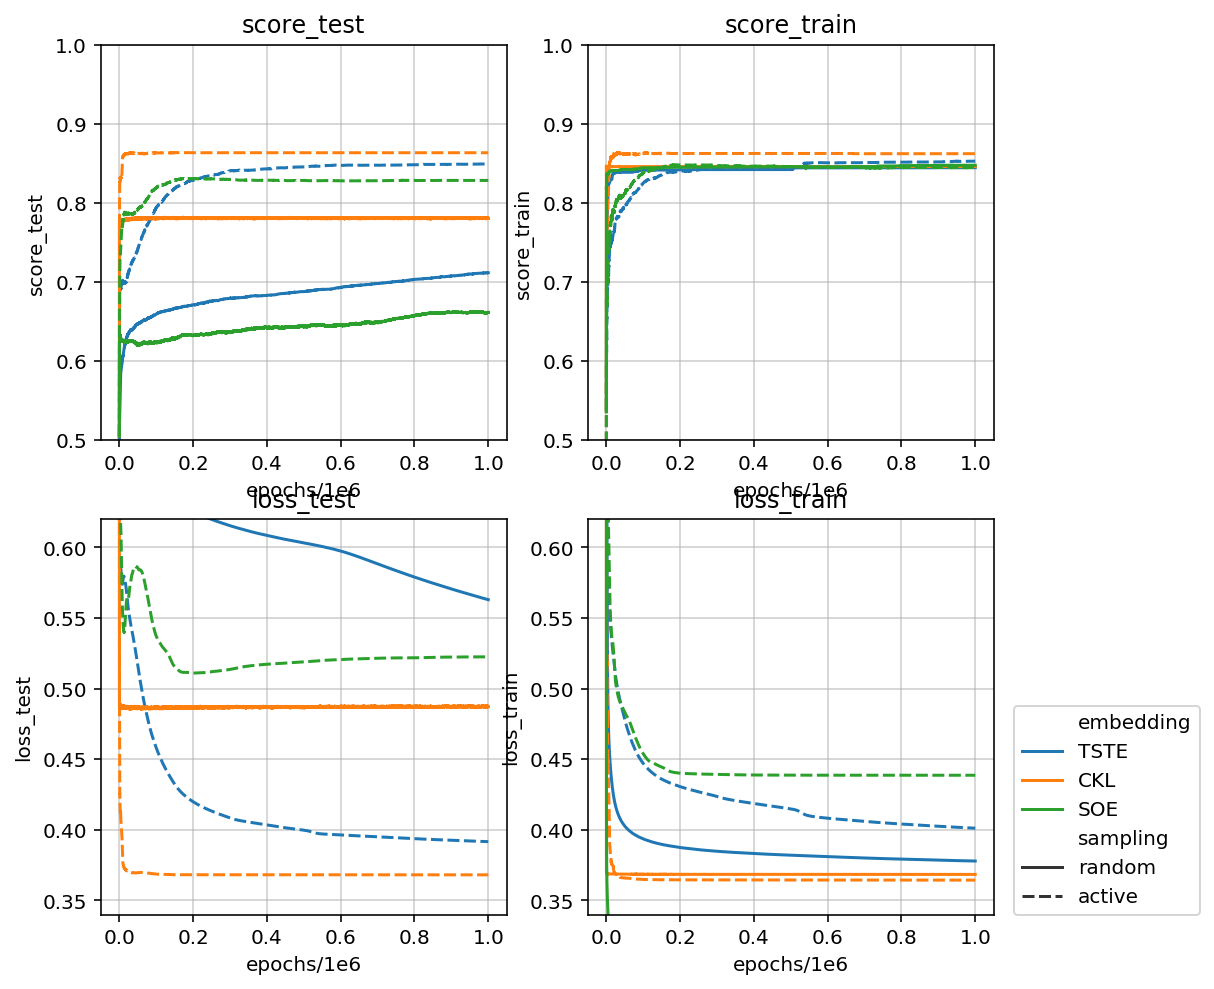

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

w = 4
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2 * w, 2 * w))
# Y = ["accuracy", "nn_diff_p20", "nn_diff_mean", "nn_acc"]
Y = ["score_test", "score_train", "loss_test", "loss_train"]
hue_order = sorted(list(df.alg.unique()))
for k, (y, ax) in enumerate(zip(Y, axs.flatten())):
    _ = sns.lineplot(
        x="epochs/1e6",
        y=y,
        style="sampling",
        hue="embedding",
#         hue_order=hue_order,
        data=df,
        ax=ax,
        ci=None,
    )
    _ = ax.grid(alpha=0.6)
    _ = ax.set_title(y)
    if k != 3:
        ax.legend_.remove()
    else:
        ax.legend(loc=(1.05, 0))
    if "score" in y:
        _ = ax.set_ylim(0.5, 1)
    elif "loss" in y:
        _ = ax.set_ylim(0.34, 0.62)
#     if "loss" in y:
#     ax.set_xscale("log")